In [55]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
import seaborn as sns

In [3]:
spam = pd.read_csv('spam.csv', encoding='latin-1')

In [4]:
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
spam.shape

(5572, 5)

Data Processing


In [6]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
spam = spam[['v1', 'v2']]

In [17]:
spam.sample().values


array([['spam',
        'Block Breaker now comes in deluxe format with new features and great graphics from T-Mobile. Buy for just å£5 by replying GET BBDELUXE and take the challenge']],
      dtype=object)

In [18]:
spam = spam.rename(columns={'v1': 'label', 'v2': 'text'})

In [19]:
spam.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
encoder = LabelEncoder()
spam['label'] = encoder.fit_transform(spam['label'])

In [23]:
spam.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
spam.isnull().sum()


label    0
text     0
dtype: int64

In [26]:
spam.duplicated().sum()

403

In [27]:
spam = spam.drop_duplicates(keep='first')

In [28]:
spam.duplicated().sum()

0

In [29]:
spam.shape

(5169, 2)

In [30]:
spam['label'].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1e668faac10>,
 [Text(-0.42519443516002475, -1.0144997251399075, 'ham'),
  Text(0.42519434017570373, 1.014499764949479, 'spam')],
 [Text(-0.23192423736001347, -0.5533634864399495, '87.37%'),
  Text(0.2319241855503838, 0.5533635081542612, '12.63%')])

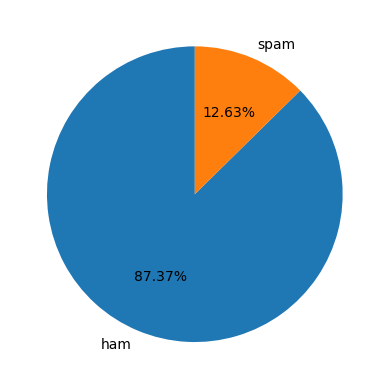

In [34]:
plt.pie(spam['label'].value_counts(), labels=['ham', 'spam'], autopct='%1.2f%%', startangle=90)

In [36]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Abhyudaya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [37]:
spam['num_characters'] = spam['text'].apply(len)

In [41]:
spam['num_words'] =  spam['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [42]:
spam.head()

,label,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [45]:
spam['num_sentence'] =  spam['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [46]:
spam.head()

,label,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [51]:
spam[['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [52]:
spam[spam['label']==0 ][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [53]:
spam[spam['label']==1 ][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

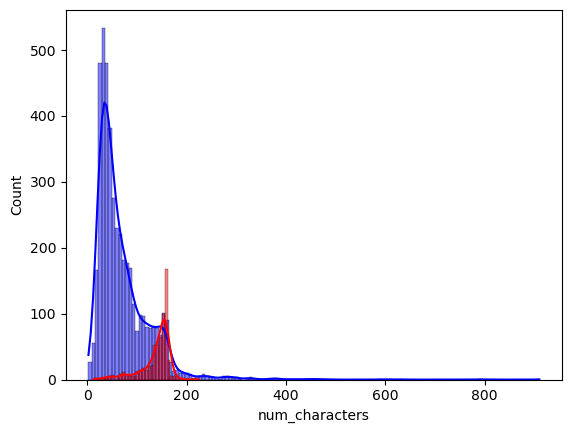

In [57]:
#it is clearly visitble that number of characters are more in spam messages than ham messages
sns.histplot(spam[spam['label']==0]['num_characters'], color='blue', kde=True)
sns.histplot(spam[spam['label']==1]['num_characters'], color='red', kde=True)

<Axes: xlabel='num_words', ylabel='Count'>

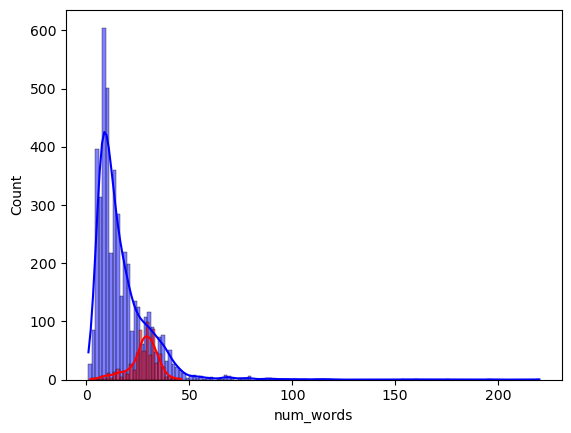

In [58]:
sns.histplot(spam[spam['label']==0]['num_words'], color='blue', kde=True)
sns.histplot(spam[spam['label']==1]['num_words'], color='red', kde=True)

## Data Preprocessing
1. Lower Case
2. Tokenization
3. Removing Special characters
4. Removing Stop words
5. Stemming

In [79]:
from nltk.corpus import stopwords
nltk.download('stopwords')
dataStop = stopwords.words('english')
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abhyudaya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [91]:
def helper(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = [] 
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y.copy()
    y = []
    for i in text:
        if i not in dataStop:
            y.append(i)
    text = y.copy()
    y = []
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)
    

In [93]:
spam['new_text'] = spam['text'].apply(helper)

In [94]:
spam.head()

,label,text,num_characters,num_words,num_sentence,new_text
0,0,go jurong point crazi avail bugi n great world...,111,24,2,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni,29,8,2,ok lar joke wif u oni
2,1,free entri 2 wkli comp win fa cup final tkt 21...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say earli hor u c alreadi say,49,13,1,u dun say earli hor u c alreadi say
4,0,nah think goe usf live around though,61,15,1,nah think goe usf live around though


In [99]:

from wordcloud import WordCloud
wc = WordCloud(width=50, height=50, background_color='white')